In [1]:
from itertools import permutations
import random
import matplotlib.pyplot as plt

C:\Users\pars iran\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pars iran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\pars iran\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def initialization(num_pop = 100):
    queens = list(range(1, 9))
    permuted = list(permutations(queens, 8))
    random.shuffle(permuted)
    choromosomes = random.sample(permuted, num_pop)
    population = []
    for parent in choromosomes:
        fitness = calculate_fitness(parent)
        population.append((list(parent),fitness))
    return population

In [3]:
def parent_selection(population):
    selected = random.choices(population, k=5)   
    parents = sorted(selected, key=lambda x: x[1], reverse=False)
    best1, best2 = parents[:2]
    return best1, best2

In [4]:
# sum of collisions
def calculate_fitness(chromosome):
    h_collisions = (sum([chromosome.count(queen) - 1 for queen in chromosome]) / 2)
    num_queens = len(chromosome)
    l_diagonal_collisions = [0] * (2 * num_queens - 1)
    r_diagonal_collisions = [0] * (2 * num_queens - 1)
    for i in range(num_queens):
        l_diagonal_collisions[i + chromosome[i] - 1] += 1
        r_diagonal_collisions[len(chromosome) - i + chromosome[i] - 2] += 1

    d_collisions = 0
    for i in range(2 * num_queens - 1):
        counter = 0
        if l_diagonal_collisions[i] > 1:
            counter += l_diagonal_collisions[i] - 1
        if r_diagonal_collisions[i] > 1:
            counter += r_diagonal_collisions[i] - 1
        d_collisions += counter
    collisions = h_collisions + d_collisions
    return collisions

In [5]:
def Recombination(parent1, parent2,pc = 1):
    length = len(parent1)
    select_offsprings = random.random() < pc
    if not select_offsprings:
        return parent1, parent2
    
    #cut
    cut_point = random.randint(0,length - 1)
    
    parent1_left, parent1_right = parent1[:cut_point], parent1[cut_point:]
    parent2_left, parent2_right = parent2[:cut_point], parent2[cut_point:]
    
    #fill
    def combine_genes(part1, part2, complement):
        unique_genes = part1 + [x for x in part2 if x not in part1]
        missing_genes = []
        if len(unique_genes) != length:
            missing_genes = [x for x in complement if x not in unique_genes]
        return unique_genes + missing_genes

    offspring1 = combine_genes(parent1_left, parent2_right, parent2_left)
    offspring2 = combine_genes(parent2_left, parent1_right, parent1_left)
    
    return offspring1, offspring2

In [6]:
def mutation(chromosome,pm=0.8):
    if random.random() < pm:
        position1, position2 = random.sample(range(8), 2)
        chromosome[position1], chromosome[position2] = chromosome[position2], chromosome[position1]
    return chromosome

In [7]:
def display_chessboard(chromosome):
    board_size = len(chromosome)
    for row in range(board_size):
        row_str = "|"
        for col in range(board_size):
            if chromosome[row] == col + 1:
                row_str += " Q |"  
            else:
                row_str += "   |"  
        print("-" * (board_size * 4 + 1))
        print(row_str)
    print("-" * (board_size * 4 + 1))


In [8]:
def best_inpop(population):
    population = sorted(population, key=lambda x: x[1], reverse=False)
    best = population[0]
    return best

In [9]:
def replace_worst(population, chromosome):
    population = sorted(population, key=lambda x: x[1], reverse=True)
    population[0] = chromosome
    random.shuffle(population)
    return population

In [10]:
def survival_selection(population):
    population = sorted(population, key=lambda x: x[1], reverse=True)
    del population[0]
    del population[0] 
    random.shuffle(population)
    return population

In [11]:
def check_solution(population):
    solutions = []
    for chromosome,fitness in population:
        if fitness == 0:
            solutions.append(chromosome)
    return solutions

In [12]:
def calculate_fitness_statistics(fitness_values, num_pop):
    max_fitness = max(fitness_values)
    average_fitness = sum(fitness_values) / num_pop
    return max_fitness, average_fitness

In [13]:
def plot_fintness_statistics(fitness_statistics):
    generation_numbers = list(range(len(fitness_statistics)))
    plt.plot(generation_numbers, [tup[0] for tup in fitness_statistics], label='Max Fitness')
    plt.plot(generation_numbers, [tup[1] for tup in fitness_statistics], label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Value')
    plt.legend()
    plt.title('Fitness per Generation')
    plt.show()

In [14]:
def main():
    num_pop = 100
    population = initialization(num_pop)
    fitness_statistics = []
    fitness_values = [chromosome[1] for chromosome in population]
    fitness_statistics.append(calculate_fitness_statistics(fitness_values,num_pop))
    
    solutions = check_solution(population)
    if len(solutions) > 0:
        print("Solution was in initial population")
        print()
        for solution in solutions:
            print(solution)
            display_chessboard(solution)
            print("-" * (len(solution) * 4 + 1))
            print()
        return
    
    num_fitness_eve = 100
    while True and num_fitness_eve <= 10000:        
        parent1,parent2 = parent_selection(population)
        offspring1, offspring2 = Recombination(parent1[0], parent2[0])
        offspring1 = mutation(offspring1)
        offspring2 = mutation(offspring2)
        
        offspring1 = (offspring1,calculate_fitness(offspring1))
        offspring2 = (offspring2,calculate_fitness(offspring2))
        num_fitness_eve += 2
        population += [offspring1, offspring2]
        
        population = survival_selection(population)
        
        fitness_values = [chromosome[1] for chromosome in population]
        fitness_statistics.append(calculate_fitness_statistics(fitness_values,num_pop))
        
        solutions = check_solution(population)
        if len(solutions) > 0:
            break   
    
    if len(solutions) > 0:
        for solution in solutions:
            print(solution)
            display_chessboard(solution)
            print("-" * (len(solution) * 4 + 1))
            print()
    else:
        print("The algorithm was not able to find any solution")
            

    plot_fintness_statistics(fitness_statistics)


[3, 6, 8, 2, 4, 1, 7, 5]
---------------------------------
|   |   | Q |   |   |   |   |   |
---------------------------------
|   |   |   |   |   | Q |   |   |
---------------------------------
|   |   |   |   |   |   |   | Q |
---------------------------------
|   | Q |   |   |   |   |   |   |
---------------------------------
|   |   |   | Q |   |   |   |   |
---------------------------------
| Q |   |   |   |   |   |   |   |
---------------------------------
|   |   |   |   |   |   | Q |   |
---------------------------------
|   |   |   |   | Q |   |   |   |
---------------------------------
---------------------------------



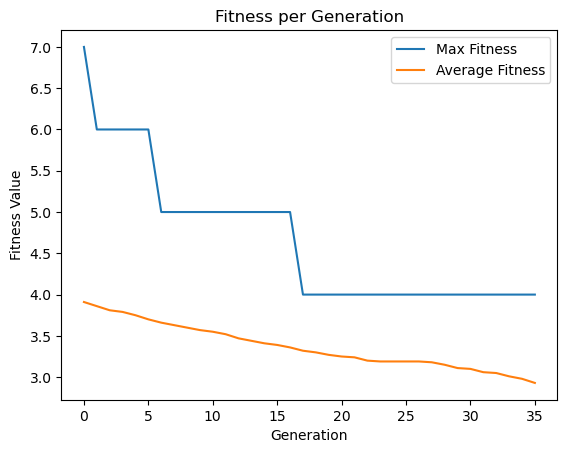

In [15]:
if __name__ == "__main__":
    main()